## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/hahaha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    if flatten: 
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1: 
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units = 10, num_neurons = [512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = "hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu', name = 'hidden_layer'+str(i+1))(x)
    
    out = keras.layers.Dense(units = output_units, activation = 'softmax', name = 'output')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model

In [8]:
model = build_mlp(input_shape = x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 174us/step - loss: 1.9410 - accuracy: 0.2993 - val_loss: 1.7832 - val_accuracy: 0.3603
Epoch 2/100
50000/50000 [==============================] - 8s 158us/step - loss: 1.7276 - accuracy: 0.3805 - val_loss: 1.6426 - val_accuracy: 0.4205
Epoch 3/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.6356 - accuracy: 0.4150 - val_loss: 1.6200 - val_accuracy: 0.4236
Epoch 4/100
50000/50000 [==============================] - 7s 150us/step - loss: 1.5594 - accuracy: 0.4407 - val_loss: 1.5108 - val_accuracy: 0.4626
Epoch 5/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.5232 - accuracy: 0.4544 - val_loss: 1.5082 - val_accuracy: 0.4612
Epoch 6/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.4787 - accuracy: 0.4708 - val_loss: 1.4576 - val_accuracy: 0.4801
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 132us/step - loss: 0.6086 - accuracy: 0.7830 - val_loss: 1.9311 - val_accuracy: 0.5177
Epoch 56/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.6047 - accuracy: 0.7828 - val_loss: 1.9436 - val_accuracy: 0.5107
Epoch 57/100
50000/50000 [==============================] - 7s 133us/step - loss: 0.5836 - accuracy: 0.7917 - val_loss: 1.8891 - val_accuracy: 0.5135
Epoch 58/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.5780 - accuracy: 0.7950 - val_loss: 1.9486 - val_accuracy: 0.5120
Epoch 59/100
50000/50000 [==============================] - 7s 133us/step - loss: 0.5677 - accuracy: 0.7982 - val_loss: 2.0949 - val_accuracy: 0.4997
Epoch 60/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.5714 - accuracy: 0.7943 - val_loss: 2.0709 - val_accuracy: 0.5055
Epoch 61/100
50000/50000 [==============================] - 7s 133us/step - loss: 0.5472 - accuracy: 0.8061 - val

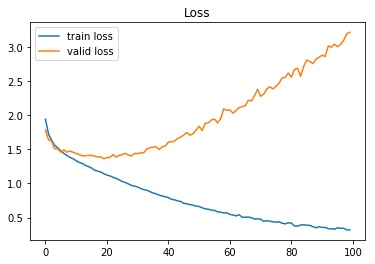

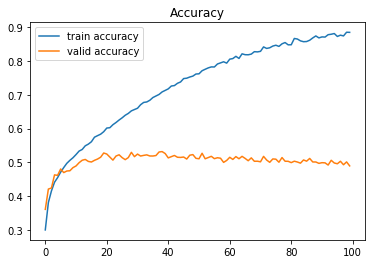

In [13]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [14]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
model2 = build_mlp(input_shape = x_train.shape[1:], num_neurons=[512, 256, 128, 128, 64])
model2.summary()

LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650 

In [22]:
optimizer2 = keras.optimizers.Adam(lr=LEARNING_RATE)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer2)

In [23]:
model2.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 153us/step - loss: 1.9411 - accuracy: 0.2880 - val_loss: 1.7738 - val_accuracy: 0.3617
Epoch 2/100
50000/50000 [==============================] - 7s 150us/step - loss: 1.7324 - accuracy: 0.3755 - val_loss: 1.6708 - val_accuracy: 0.3949
Epoch 3/100
50000/50000 [==============================] - 8s 151us/step - loss: 1.6443 - accuracy: 0.4103 - val_loss: 1.5729 - val_accuracy: 0.4345
Epoch 4/100
50000/50000 [==============================] - 7s 150us/step - loss: 1.5809 - accuracy: 0.4338 - val_loss: 1.5460 - val_accuracy: 0.4468
Epoch 5/100
50000/50000 [==============================] - 8s 150us/step - loss: 1.5221 - accuracy: 0.4557 - val_loss: 1.5204 - val_accuracy: 0.4531
Epoch 6/100
50000/50000 [==============================] - 7s 149us/step - loss: 1.4821 - accuracy: 0.4680 - val_loss: 1.5284 - val_accuracy: 0.4496
Epoch 7/100
50000/50000 [==============================]

50000/50000 [==============================] - 7s 149us/step - loss: 0.5473 - accuracy: 0.8017 - val_loss: 2.1750 - val_accuracy: 0.5043
Epoch 56/100
50000/50000 [==============================] - 9s 186us/step - loss: 0.5379 - accuracy: 0.8062 - val_loss: 2.1412 - val_accuracy: 0.5195
Epoch 57/100
50000/50000 [==============================] - 8s 153us/step - loss: 0.5058 - accuracy: 0.8193 - val_loss: 2.2554 - val_accuracy: 0.5084
Epoch 58/100
50000/50000 [==============================] - 8s 150us/step - loss: 0.5167 - accuracy: 0.8128 - val_loss: 2.2239 - val_accuracy: 0.4998
Epoch 59/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.5318 - accuracy: 0.8077 - val_loss: 2.1991 - val_accuracy: 0.5113
Epoch 60/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.5092 - accuracy: 0.8166 - val_loss: 2.3079 - val_accuracy: 0.5039
Epoch 61/100
50000/50000 [==============================] - 8s 151us/step - loss: 0.4724 - accuracy: 0.8292 - val

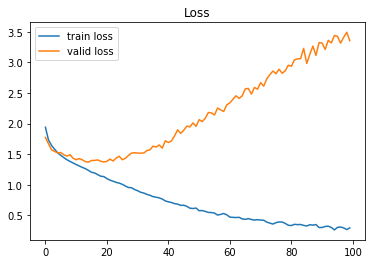

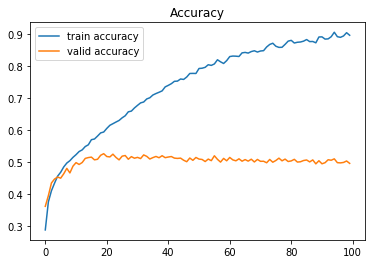

In [24]:
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["accuracy"]
valid_acc = model2.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()